# 03 Data Visualization

## Introduction

This notebook focuses on the **data visualization** phase of the Traffic Accident Analysis project. The purpose of this step is to explore accident patterns through charts and geospatial maps, providing insights that are not immediately visible in raw tables.  

During this phase, I will:  
- Visualize the distribution of accident severity and location.  
- Identify regional accident hotspots using geospatial heatmaps.  
- Explore temporal patterns and relationships between variables.  
- Incorporate interactive filters (e.g., by severity, state, and date range) to allow dynamic exploration of the data.  

By the end of this notebook, I will have a clearer understanding of accident trends across geography and time. These insights will serve as a foundation for building predictive models in Notebook 4.


## Step 1(a): Load and Inspect Data

Here I load the cleaned dataset and perform basic checks to confirm it was imported correctly.  
This includes viewing the shape, column names, and the first few rows.

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Loading cleaned dataset
df = pd.read_csv("../data/final_cleaned_accident_data.csv")

# Check dataset shape (rows, columns)
print("Shape:", df.shape)

# View column names
print("\nColumns:")
print(df.columns.tolist())

# Preview first 5 rows
df.head()

Shape: (6985228, 40)

Columns:
['Source', 'Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Street', 'City', 'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


Source  Severity           Start_Time  Start_Lat  Start_Lng  Distance(mi)  \
0  Source2         3  2016-02-08 05:46:00  39.865147 -84.058723          0.01   
1  Source2         2  2016-02-08 06:07:59  39.928059 -82.831184          0.01   
2  Source2         2  2016-02-08 06:49:27  39.063148 -84.032608          0.01   
3  Source2         3  2016-02-08 07:23:34  39.747753 -84.205582          0.01   
4  Source2         2  2016-02-08 07:39:07  39.627781 -84.188354          0.01   

                      Street          City      County State  ... Roundabout  \
0                     I-70 E        Dayton  Montgomery    OH  ...      False   
1                   Brice Rd  Reynoldsburg    Franklin    OH  ...      False   
2             State Route 32  Williamsburg    Clermont    OH  ...      False   
3                     I-75 S        Dayton  Montgomery    OH  ...      False   
4  Miamisburg Centerville Rd        Dayton  Montgomery    OH  ...      False   

  Station   Stop Traffic_Calming  Traffic_Signal  Turning_Loop  \
0   False  False           False           False         False   
1   False  False           False           False         False   
2   False  False           False            True         False   
3   False  False           False           False         False   
4   False  False           False            True         False   

   Sunrise_Sunset  Civil_Twilight  Nautical_Twilight Astronomical_Twilight  
0           Night           Night              Night                 Night  
1           Night           Night              Night                   Day  
2           Night           Night                Day                   Day  
3           Night             Day                Day                   Day  
4             Day             Day                Day                   Day  

[5 rows x 40 columns]

## Step 1(b): Data Types and Missing Values

Before visualizing, I want to confirm the data types of each column and check how many non-null values each contains.


In [3]:
# Display datatypes and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6985228 entries, 0 to 6985227
Data columns (total 40 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Source                 object 
 1   Severity               int64  
 2   Start_Time             object 
 3   Start_Lat              float64
 4   Start_Lng              float64
 5   Distance(mi)           float64
 6   Street                 object 
 7   City                   object 
 8   County                 object 
 9   State                  object 
 10  Zipcode                object 
 11  Timezone               object 
 12  Airport_Code           object 
 13  Weather_Timestamp      object 
 14  Temperature(F)         float64
 15  Wind_Chill(F)          float64
 16  Humidity(%)            float64
 17  Pressure(in)           float64
 18  Visibility(mi)         float64
 19  Wind_Direction         object 
 20  Wind_Speed(mph)        float64
 21  Precipitation(in)      float64
 22  Weather_Condition 

## Step 1(c): Summary Statistics

Next, I’ll generate summary statistics to check the numerical columns to understand their ranges and averages, and to see if there are obvious outliers that might affect my analysis.


In [4]:
# Summary statistics for numerical columns
df.describe().T


count       mean        std         min         25%  \
Severity           6985228.0   2.229248   0.498871    1.000000    2.000000   
Start_Lat          6985228.0  36.226467   5.055433   24.554800   33.422088   
Start_Lng          6985228.0 -94.765767  17.355449 -124.623833 -117.217552   
Distance(mi)       6985228.0   0.516879   1.746987    0.000000    0.000000   
Temperature(F)     6985228.0  61.733494  18.726477  -89.000000   50.000000   
Wind_Chill(F)      6985228.0  59.126660  19.056552  -89.000000   52.000000   
Humidity(%)        6985228.0  65.063512  22.545655    1.000000   49.000000   
Pressure(in)       6985228.0  29.564573   0.978442    0.000000   29.410000   
Visibility(mi)     6985228.0   9.114111   2.679151    0.000000   10.000000   
Wind_Speed(mph)    6985228.0   7.641697   5.197583    0.000000    5.000000   
Precipitation(in)  6985228.0   0.006080   0.097203    0.000000    0.000000   

                         50%        75%          max  
Severity            2.000000   2.000000     4.000000  
Start_Lat          35.815208  40.096470    49.002201  
Start_Lng         -87.894154 -80.387223   -67.113167  
Distance(mi)        0.010000   0.388000   441.750000  
Temperature(F)     64.000000  75.900000   207.000000  
Wind_Chill(F)      62.000000  70.000000   207.000000  
Humidity(%)        67.000000  84.000000   100.000000  
Pressure(in)       29.870000  30.030000    58.630000  
Visibility(mi)     10.000000  10.000000   140.000000  
Wind_Speed(mph)     7.000000  10.000000  1087.000000  
Precipitation(in)   0.000000   0.000000    36.470000

## Step 1(d): Categorical Summary

In addition to numerical features, the dataset contains several categorical columns (e.g., `State`, `City`, `Weather_Condition`).  
To better understand these, I’ll display these columns to see the most frequent values, like which state or weather condition occurs most often.


In [5]:
# Summary statistics for categorical columns
df.describe(include=["object", "category"]).T


count   unique                  top     freq
Source                 6985228        3              Source1  3582466
Start_Time             6985228  5539720  2021-01-26 16:16:13      225
Street                 6985228   319644               I-95 N    71314
City                   6985228    13601              Houston   159960
County                 6985228     1868          Los Angeles   479604
State                  6985228       49                   CA  1567136
Zipcode                6985228   771884                91761    11911
Timezone               6985228        4           US/Eastern  3211766
Airport_Code           6985228     2045                 KCQT   107460
Weather_Timestamp      6985228   922562  2022-03-13 01:53:00      968
Wind_Direction         6985228       25                 CALM   840886
Weather_Condition      6985228      144                 Fair  2206054
Sunrise_Sunset         6985228        2                  Day  4851072
Civil_Twilight         6985228        2                  Day  5181114
Nautical_Twilight      6985228        2                  Day  5526460
Astronomical_Twilight  6985228        2                  Day  5799019

## Step 1 Summary

The dataset was successfully loaded with just under 7 million rows and 40 columns.  
- Numerical features show realistic ranges, but there are some extreme outliers (e.g. distances >400 miles, unrealistic temperatures, and very high wind speeds).  
- Categorical features show California, Los Angeles County, and Houston as major accident hotspots.  
- Most accidents occurred during the day and under fair weather conditions.  

Now i will know what to expect for visualization, where Stats will be shown more effectively through charts and maps.


## Step 2(a): Accident Severity Distribution

To start, I want to visualize how accident severity is distributed across the dataset.  
This will help confirm whether the severity levels are balanced or if certain levels dominate the data.


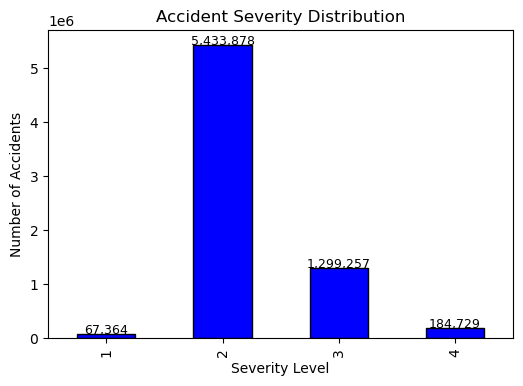

In [4]:
# Severity distribution
severity_counts = df["Severity"].value_counts().sort_index()

plt.figure(figsize=(6,4))
ax = severity_counts.plot(kind="bar", color="blue", edgecolor="black")
ax.set_title("Accident Severity Distribution")
ax.set_xlabel("Severity Level")
ax.set_ylabel("Number of Accidents")

# Add value labels
for i, v in enumerate(severity_counts):
    ax.text(i, v + 5000, f"{v:,}", ha="center", fontsize=9)

plt.show()


## Step 2(b): Top States by Accident Count

Next, I’ll check which U.S. states report the highest number of accidents.  
This gives a first geographic perspective before moving on to maps.


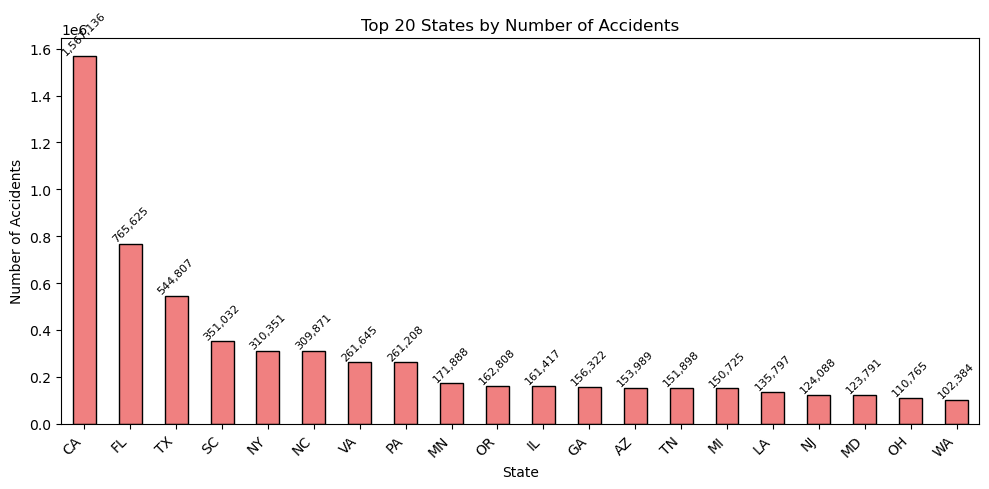

In [5]:
# Top 20 states by accident count
state_counts = df["State"].value_counts().head(20)

plt.figure(figsize=(10,5))
ax = state_counts.plot(kind="bar", color="lightcoral", edgecolor="black")
ax.set_title("Top 20 States by Number of Accidents")
ax.set_xlabel("State")
ax.set_ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")

# adding lable values in diagonally as they were overlapping
for i, v in enumerate(state_counts):
    ax.text(i, v, f"{v:,}", ha="center", va="bottom", fontsize=8, rotation=45)


plt.tight_layout()
plt.show()


## Step 2 Summary

- Accident severity is shlolwing majority are at level 2, showing most incidents are moderate.  
- California is by far the highest accident state, followed by other large/populous states.  
- These patterns highlight where accidents concentrate and set up the move to the next step.


## Step 3(a): Accident Heatmap (All Accidents)

To understand the geographic distribution of accidents, I will create a folium heatmap using latitude and longitude data.  
This will highlight hotspots across the U.S.


In [6]:
import folium
from folium.plugins import HeatMap
import os

# Make 'visuals' folder if not already there
os.makedirs("visuals", exist_ok=True)

# Start map centered on the US
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4, tiles="cartodbdark_matter")

# Sample the data (plotting all points would be too much)
sample_df = df.sample(100000, random_state=42)  # 100k random points

# Create heatmap
heat_data = list(zip(sample_df["Start_Lat"], sample_df["Start_Lng"]))
HeatMap(heat_data, radius=8, blur=6).add_to(m)

# Save map
m.save("visuals/accident_heatmap.html")

# Display map in notebook
m


📍 [View the interactive accident heatmap](https://TiarnanTuite.github.io/traffic_accident_analysis/accident_heatmap.html)


## Step 3(a) Summary

The heatmap highlights accident hotspots across the U.S.  

- The East Coast shows a much higher concentration of accidents.  
- This makes sense given higher population density compared to the West.  
- California also stands out as a major hotspot, but the overall spread in the West is more sparse.  

This confirms the earlier state-level findings (California and Eastern states dominating) and provides a clear geographic visualization of accident concentration.


## Step 3(b): User Input for specific state Accident Heatmaps

I added functionality that allows users to input a U.S state code (e.g. **CA** for California, **NY** for New York).  
This generates a heatmap of accident locations and some basic statistics for the selected state:

- **Total accidents recorded**
- **Average severity score**
- **Most common city for accidents**
- **Most common weather condition**

This lets you highlight how accident patterns vary across states.


In [7]:
import os
# needed to force showing map in notebook as doesnt work when indented(not last line)
from IPython.display import display

# Ask for a state code (e.g., 'CA', 'NY', 'TX')
state_input = input("Enter a state code (e.g. 'CA', 'NY', 'TX'): ").upper()

# Filter dataset for that state and save to variable
state_df = df[df["State"] == state_input]

# check stats on saved state
if state_df.empty:
    print(f"No accidents found for state: {state_input}")
else:
    print(f"{len(state_df):,} accidents found in {state_input}")
    
    # Basic Stats
    avg_severity = state_df["Severity"].mean()
    top_city = state_df["City"].mode()[0] if not state_df["City"].isnull().all() else "Unknown"
    common_weather = state_df["Weather_Condition"].mode()[0] if not state_df["Weather_Condition"].isnull().all() else "Unknown"
    
    print(f"Average Severity: {avg_severity:.2f}")
    print(f"Most Common City: {top_city}")
    print(f"Most Common Weather: {common_weather}")
    
    # random 50k Sample for performance
    sample_state = state_df.sample(min(50000, len(state_df)), random_state=42)
    
    # Create map centered on state
    m = folium.Map(location=[sample_state["Start_Lat"].mean(), 
                             sample_state["Start_Lng"].mean()],
                   zoom_start=6, tiles="cartodbdark_matter")
    
    # Create heatmap
    heat_data = list(zip(sample_state["Start_Lat"], sample_state["Start_Lng"]))
    HeatMap(heat_data, radius=8, blur=6).add_to(m)

    os.makedirs("visuals", exist_ok=True)
    filename = f"visuals/accident_heatmap_{state_input}.html"
    m.save(filename)

    print(f"Map saved as {filename}")
    
# Show map in notebook if it exists
if m: 
 display(m)  
    


310,351 accidents found in NY
Average Severity: 2.29
Most Common City: Bronx
Most Common Weather: Fair
Map saved as visuals/accident_heatmap_NY.html


## Step 3(b) Summary  

I added interactivity by allowing the user to select a U.S. state (e.g. `CA`, `NY`, `TX`).  
The notebook then:  

- Filters the dataset for that state  
- Prints **summary statistics** (accident count, average severity, most common city, most frequent weather condition)  
- Generates and saves a folium heat map  

If an **invalid input** (random letters or a non-existent state code) is entered, the notebook will print a warning message and **no map will be generated**.  

This ensures the notebook handles unexpected input well.  


## Step 3(c): Accident Trends Over Time (California vs New York)

To compare accident trends across states, I decided to create a line chart showing the number of accidents per year in **California (CA)** and **New York (NY)**.  

This highlights how accident counts have changed over time in different regions and provides context for later machine learning predictions.


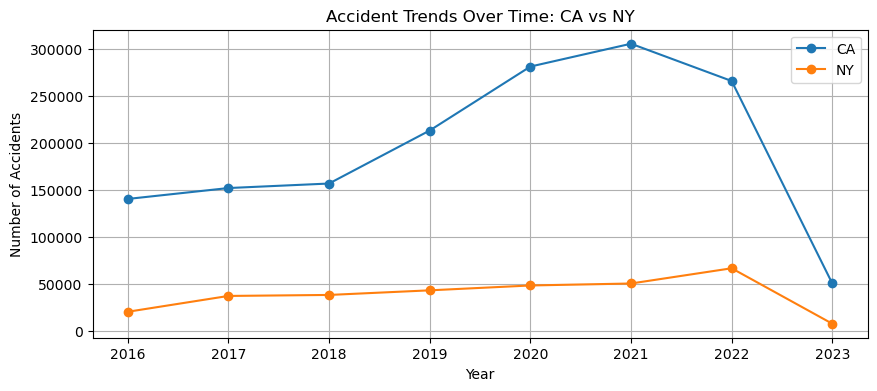

In [31]:
import matplotlib.pyplot as plt

# Extract year from Start_Time
df["Year"] = pd.to_datetime(df["Start_Time"]).dt.year

# Filter for CA and NY
state_compare = df[df["State"].isin(["CA", "NY"])]

# Group by year and state
trend = state_compare.groupby(["Year", "State"]).size().reset_index(name="Accident_Count")

# Plot
plt.figure(figsize=(10,4))
for state in ["CA", "NY"]:
    subset = trend[trend["State"] == state]
    plt.plot(subset["Year"], subset["Accident_Count"], marker="o", label=state)

plt.title("Accident Trends Over Time: CA vs NY")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.legend()
plt.grid(True)
plt.show()


## Step 3(c) Summary  

This line chart shows how accident counts changed over time in California and New York.  

- California generally reports more accidents, which may be because of higher population or traffic density.  
- New York shows similar yearly patterns but on a smaller scale.  
- This time-based comparison provides useful historical context, which will be needed when moving into **machine learning** for trend and severity prediction in Notebook 04.


## Conclusion

In this notebook, I focused on the **visualization** of accident data to show key patterns and trends.  

Results :
- **Severity Distribution**: The majority of accidents are of moderate severity (Level 2), with less extreme cases (Level 4).  
- **State-Level Accidents**: Some states, such as California and Florida, reported significantly higher accident counts compared to others.  
- **Geospatial Heatmaps**: The interactive maps highlighted accident density across the U.S., with the **East Coast and major urban areas** showing the highest concentration.  
- **User Input Feature**: Implemented an option for users to select a state and generate state-specific statistics and heatmaps. If an invalid input is entered, no map is generated, ensuring clean output handling.  
- **Comparative Analysis**: Built side-by-side charts to compare accident frequency across different states, allowing deeper insight into regional differences.  
- **Temporal Trends**: Line charts showed accident frequency changes over time, laying the foundation for predictive analysis in the next stage.  

These visualizations provide strong insights into the dataset and also showcase interactivity (state-level exploration), which will be valuable when moving into **Notebook 04 – Machine Learning**.  
